In [1]:
!pip install kaggle
!mkdir -p ~/.kaggle

from google.colab import files
files.upload()  # Esto te permitirá subir el archivo 'kaggle.json'

!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle competitions download -c taller-2

 99% 225M/227M [00:12<00:00, 21.4MB/s]
100% 227M/227M [00:12<00:00, 18.7MB/s]


In [3]:
!unzip -q /content/taller-2.zip

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import torch

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# Exploratory Data Analisis

In [7]:
x_train = np.load('/content/x_train.npy')
x_test = np.load('/content/x_test.npy')
y_train = np.load('/content/y_train.npy')
y_c1_train = np.load('/content/y_c1_train.npy')
y_c2_train = np.load('/content/y_c2_train.npy')


In [8]:
print('x_train type:', type(x_train), 'con datos', x_train.dtype)
print('x_test type:', type(x_test), 'con datos', x_test.dtype)
print('y_train type:', type(y_train), 'con datos', y_train.dtype)
print('y_c1_train type:', type(y_c1_train), 'con datos', y_c1_train.dtype)
print('y_c2_train type:', type(y_c2_train), 'con datos', y_c2_train.dtype)

x_train type: <class 'numpy.ndarray'> con datos float32
x_test type: <class 'numpy.ndarray'> con datos float32
y_train type: <class 'numpy.ndarray'> con datos float32
y_c1_train type: <class 'numpy.ndarray'> con datos float32
y_c2_train type: <class 'numpy.ndarray'> con datos float32


In [9]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_c1_train shape:', y_c1_train.shape)
print('y_c2_train shape:', y_c2_train.shape)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 100)
y_c1_train shape: (50000, 8)
y_c2_train shape: (50000, 20)


In [10]:
print(f"Rango de valores en x_train: {np.min(x_train)} a {np.max(x_train)}")
print(f"Rango de valores en x_test: {np.min(x_test)} a {np.max(x_test)}")

Rango de valores en x_train: -1.7829737663269043 a 1.9456948041915894
Rango de valores en x_test: -1.7811453342437744 a 1.9343997240066528


Podemos describir los datos de la siguiente manera.
- **x_train**: Contiene 50000 imágenes de 32x32 pixeles con 3 canales de color (RGB). Cada imagen será una matriz 3D de tamaño 32x32x3.
- **x_test**: Contiene 10000 imágenes de 32x32 pixeles con 3 canales de color, mismo formato que x_train, solo que menos imagenes.
- **y_train**: Contiene la clasificación más fina teniendo 100 clases.
- **y_c1_train**: Contiene el primer nivel de jerarquía con 8 clases clasificadas para 50000 imagenes.
- **y_c2_train**: Contiene el segundo nivel de jerarquía con 20 clases clasificadas para 50000 imagenes.

Además, ya se encuentran todos los datos estandarizados.

In [11]:
print("x_train:", x_train[:1])
print("x_test:", x_test[:1])

x_train: [[[[ 1.9456948e+00  1.9456948e+00  1.9456948e+00]
   [ 1.9456948e+00  1.9456948e+00  1.9456948e+00]
   [ 1.9456948e+00  1.9456948e+00  1.9456948e+00]
   ...
   [ 1.0683609e+00  1.2145833e+00  1.0391165e+00]
   [ 1.3169389e+00  1.4924057e+00  1.1999611e+00]
   [ 8.7827200e-01  1.0537387e+00  6.5893853e-01]]

  [[ 1.9456948e+00  1.9456948e+00  1.9456948e+00]
   [ 1.9310725e+00  1.9310725e+00  1.9310725e+00]
   [ 1.9310725e+00  1.9310725e+00  1.9310725e+00]
   ...
   [ 7.0280522e-01  7.9053861e-01  4.1036063e-01]
   [ 5.7120514e-01  6.7356080e-01  1.1791605e-01]
   [ 3.5187173e-01  4.6884957e-01 -1.3066186e-01]]

  [[ 1.9456948e+00  1.9456948e+00  1.9456948e+00]
   [ 1.9310725e+00  1.9310725e+00  1.9310725e+00]
   [ 1.9456948e+00  1.9456948e+00  1.9456948e+00]
   ...
   [ 9.8062760e-01  1.1268499e+00  6.8818301e-01]
   [ 6.4431632e-01  8.1978309e-01  1.1791605e-01]
   [-1.3684020e-02  1.6178274e-01 -5.1083982e-01]]

  ...

  [[ 3.8111618e-01  9.2213869e-01 -6.2781769e-01]
   [ 2.

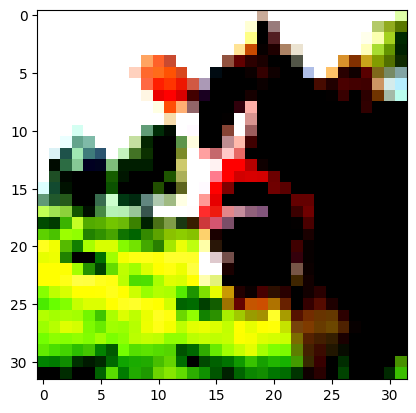

y_train: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
y_c1_train: [0. 0. 0. 0. 1. 0. 0. 0.]
y_c2_train: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
plt.imshow(x_train[0])
plt.show()
print("y_train:", y_train[0])
print("y_c1_train:", y_c1_train[0])
print("y_c2_train:", y_c2_train[0])

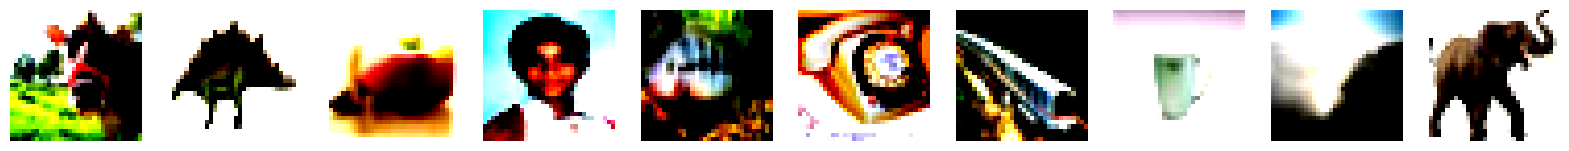

In [12]:
# mostrar las 10 primeras imagenes
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(x_train[i])
    axes[i].axis('off')
plt.show()


In [13]:
for i in range(len(x_train) - 1):  # Ajuste para evitar indexación fuera del rango
    if (x_train[i] == x_train[i + 1]).all():  # Verifica si todos los elementos son iguales
        print(i, i + 1)

In [14]:
def count_classes(y):
    return np.sum(y, axis=0)

class_counts_y_train = count_classes(y_train)
class_counts_y_c1_train = count_classes(y_c1_train)
class_counts_y_c2_train = count_classes(y_c2_train)

print("Cantidad de imágenes por clase en y_train:", class_counts_y_train)
print("Cantidad de imágenes por clase en y_c1_train:", class_counts_y_c1_train)
print("Cantidad de imágenes por clase en y_c2_train:", class_counts_y_c2_train)

Cantidad de imágenes por clase en y_train: [500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500.]
Cantidad de imágenes por clase en y_c1_train: [ 5000.  7500.  7500.  5000. 12500.  5000.  2500.  5000.]
Cantidad de imágenes por clase en y_c2_train: [2500. 2500. 2500. 2500. 2500. 2500. 2500. 2500. 2500. 2500. 2500. 2500.
 2500. 2500. 2500. 2500. 2500. 2500. 2500. 2500.]


Observamos que la distribución de clases en `y_train` y `y_c2_train` es completamente equilibrada, mientras que en `y_c1_train` existe un desequilibrio en la cantidad de datos entre las clases.

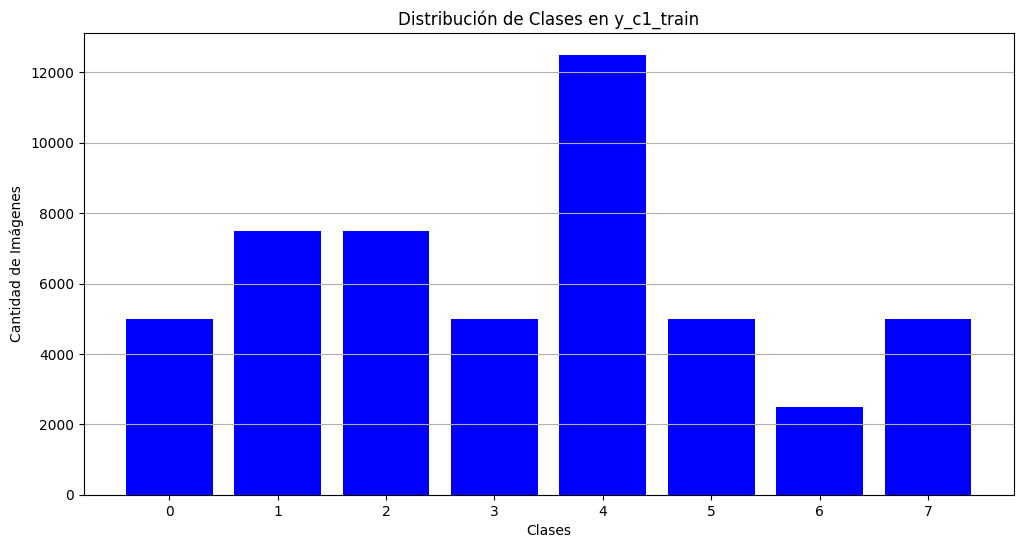

In [15]:
def plot_class_distribution(class_counts, title):
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(class_counts)), class_counts, color='blue')
    plt.xlabel('Clases')
    plt.ylabel('Cantidad de Imágenes')
    plt.title(title)
    plt.xticks(range(len(class_counts)), range(len(class_counts)))
    plt.grid(axis='y')
    plt.show()


plot_class_distribution(class_counts_y_c1_train, 'Distribución de Clases en y_c1_train')


Este desequilibrio en los datos podría causar un sesgo en el modelo, favoreciendo las clases con mayor cantidad de ejemplos y disminuyendo su capacidad para predecir correctamente aquellas con menos ejemplos, especialmente en el caso de la clase 6.

Dado que no es posible obtener más datos, se **ajustarán los pesos para `y_c1_train`**, asignando mayor peso a las clases menos representadas.


In [16]:
total_count_c1 = sum(class_counts_y_c1_train)
class_weights_c1 = [total_count_c1 / (len(class_counts_y_c1_train) * count) for count in class_counts_y_c1_train]

class_weights_c1

[1.25, 0.8333333333333334, 0.8333333333333334, 1.25, 0.5, 1.25, 2.5, 1.25]

In [20]:
class_weights_tensor_c1 = torch.FloatTensor(class_weights_c1)
class_weights_tensor_c1

tensor([1.2500, 0.8333, 0.8333, 1.2500, 0.5000, 1.2500, 2.5000, 1.2500])

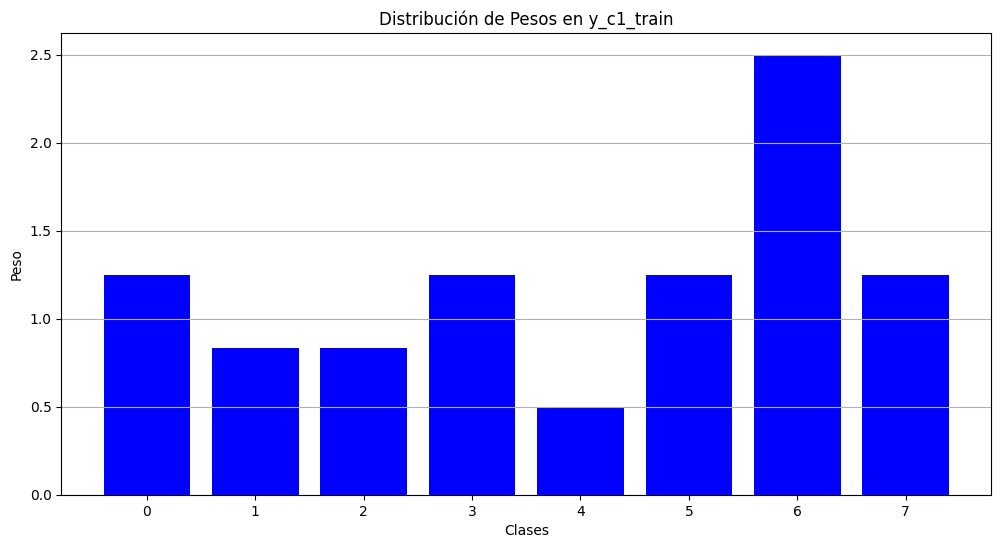

In [21]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(class_weights_tensor_c1)), class_weights_tensor_c1, color='blue')
plt.xlabel('Clases')
plt.ylabel('Peso')
plt.title('Distribución de Pesos en y_c1_train')
plt.xticks(range(len(class_weights_tensor_c1)), range(len(class_weights_tensor_c1)))
plt.grid(axis='y')
plt.show()

In [22]:
class_weights_tensor_c1 = torch.FloatTensor(class_weights_c1).to(device)

# División conjunto de entrenamiento y validación

A partir del conjunto de datos `x_train`, se realiza la división para crear los conjuntos de entrenamiento y validación, respectivamente.



In [23]:
from sklearn.model_selection import train_test_split

Los parámetros `random_state` y `stratify` en la función `train_test_split` son fundamentales para asegurar una división adecuada de los datos. El parámetro `random_state` establece una semilla para el generador de números aleatorios, lo que garantiza que la división sea reproducible en ejecuciones futuras. Por otro lado, `stratify=y_train` asegura que la proporción de las clases en el conjunto de entrenamiento y el conjunto de validación sea la misma que en el conjunto original, lo que es especialmente importante en problemas de clasificación para mantener la representación adecuada de cada clase.


In [24]:
X_train, X_val, y_train, y_val, y_c1_train, y_c1_val, y_c2_train, y_c2_val = train_test_split(
    x_train, y_train, y_c1_train, y_c2_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

In [25]:
print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_c1_train shape:', y_c1_train.shape)
print('y_c1_val shape:', y_c1_val.shape)
print('y_c2_train shape:', y_c2_train.shape)
print('y_c2_val shape:', y_c2_val.shape)

X_train shape: (40000, 32, 32, 3)
X_val shape: (10000, 32, 32, 3)
y_train shape: (40000, 100)
y_val shape: (10000, 100)
y_c1_train shape: (40000, 8)
y_c1_val shape: (10000, 8)
y_c2_train shape: (40000, 20)
y_c2_val shape: (10000, 20)


# Creación de Dataset

Se define una clase personalizada `HierarchicalDataset` que extiende la clase `Dataset`. Esta clase se encargará de convertir los datos en tensores. Posteriormente, esta implementación nos permitirá crear los `DataLoaders` necesarios para la manipulación eficiente de los datos durante el entrenamiento.


In [26]:
from torch.utils.data import DataLoader, Dataset

In [27]:
class HierarchicalDataset(Dataset):
    def __init__(self, x_data, y_data, y_c1_data, y_c2_data):
        self.x_data = torch.tensor(x_data, dtype=torch.float32).permute(0, 3, 1, 2) # Permutamos para el formato [batch, channels, height, width] que es el que ocupan las capas Conv2D
        self.y_data = torch.tensor(y_data, dtype=torch.float32)
        self.y_c1_data = torch.tensor(y_c1_data, dtype=torch.float32)
        self.y_c2_data = torch.tensor(y_c2_data, dtype=torch.float32)

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        # Devuelve una muestra junto con sus tres etiquetas
        return self.x_data[idx], self.y_data[idx], self.y_c1_data[idx], self.y_c2_data[idx]

    def shape(self):
        print('x_data shape:', self.x_data.shape, 'tipo dato:', self.x_data.dtype)
        print('y_data shape:', self.y_data.shape, 'tipo dato:', self.y_data.dtype)
        print('y_c1_data shape:', self.y_c1_data.shape, 'tipo dato:', self.y_c1_data.dtype)
        print('y_c2_data shape:', self.y_c2_data.shape, 'tipo dato:', self.y_c2_data.dtype)



In [28]:
train_dataset = HierarchicalDataset(X_train, y_train, y_c1_train, y_c2_train)
val_dataset = HierarchicalDataset(X_val, y_val, y_c1_val, y_c2_val)

In [29]:
print('Tamaño del Dataset de entrenamiento', len(train_dataset))
print('Tamaño del Dataset de validación', len(val_dataset))

Tamaño del Dataset de entrenamiento 40000
Tamaño del Dataset de validación 10000


In [30]:
train_dataset.shape()

x_data shape: torch.Size([40000, 3, 32, 32]) tipo dato: torch.float32
y_data shape: torch.Size([40000, 100]) tipo dato: torch.float32
y_c1_data shape: torch.Size([40000, 8]) tipo dato: torch.float32
y_c2_data shape: torch.Size([40000, 20]) tipo dato: torch.float32


# Creación DataLoaders

Se utilizan los datasets creados anteriormente para generar los `DataLoaders`, que facilitan la manipulación de los datos en lotes (batches) durante el entrenamiento.

Antes de crear un `DataLoader`, es necesario definir el tamaño de los lotes (`batch_size`), que es un parámetro esencial para su creación.

El parámetro `shuffle`, cuando se establece en `True`, permite que los datos sean barajados antes de ser divididos en los lotes. Esto garantiza que el orden de las muestras cambie en cada época durante el entrenamiento, lo que ayuda a reducir el sesgo. Cabe destacar que `shuffle=True` se utiliza únicamente durante el entrenamiento y no en la fase de validación.


In [32]:
batch_size = 164
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [33]:
print('Tamaño DataLoader de entrenamiento:', len(train_loader))
print('Tamaño DataLoader de validación:', len(val_loader))

Tamaño DataLoader de entrenamiento: 244
Tamaño DataLoader de validación: 61


Observamos que los tamaños de los `DataLoaders` no coinciden con los tamaños de los `Datasets` creados anteriormente. Esto se debe a la división en lotes que se realiza al crear los `DataLoaders`. Sabemos que el tamaño del conjunto de datos de entrenamiento es de 40,000 y el del conjunto de validación es de 10,000. Por lo tanto, el tamaño del `DataLoader` se calcula **dividiendo el tamaño del conjunto de datos entre el** `batch_size`.


# Transfer Learning y Fine Tuning

***Transfer learning*** es una técnica en deep learning que permite reutilizar un modelo preentrenado del estado del arte en una tarea similar. En lugar de entrenar un modelo desde cero, se aprovechan las características ya aprendidas por el modelo en conjuntos de datos grandes (como *ImageNet*, *Open Images*, *COCO*, y *Places365*), que contienen millones de imágenes. En este proceso, típicamente se reemplazan y ajustan solo las últimas capas densas para adaptarlas a la nueva tarea específica, acelerando el entrenamiento y mejorando la precisión en conjuntos de datos más pequeños.

***Fine tuning***, por otro lado, es una técnica específica dentro del transfer learning que permite ajustar o "afinar" algunas o todas las capas del modelo preentrenado. Esto implica congelar las primeras capas, que han aprendido características generales, y dejar entrenables las capas superiores para adaptar el modelo a una tarea más específica.



# Transfer learning con EfficientNet

**EfficientNet** es una familia de arquitecturas de redes neuronales convolucionales desarrollada por Google, que optimiza la precisión y eficiencia computacional. Utiliza un enfoque de escalado compuesto para ajustar uniformemente la profundidad, ancho y resolución de la red, logrando resultados de vanguardia en clasificación de imágenes con menos parámetros que modelos anteriores.


## Modelo EfficientNet B0

In [34]:
import torch.nn as nn
from torchvision import models

In [80]:
efficient_net_model =  models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)

Necesitamos mantener los parámetros ya aprendidos por el modelo intactos, por lo cuál se **congelan** los gradientes mediante  `requires_grad = False` en cada parámetro del modelo.

In [81]:
def freeze_model(base_model):
  for param in base_model.parameters():
    param.requires_grad = False
  return base_model

In [82]:
efficient_net_model = freeze_model(efficient_net_model)

## Nuevo modelo con base EfficientNet B0

Definimos un nuevo modelo basado en el modelo de **EfficientNet B0**. Este nuevo modelo incorpora capas densas adicionales al final de **EfficientNet**, que producirán la salida necesaria para nuestra clasificación jerárquica.


Necesitamos conocer la cantidad de `in_features` de la última capa de **EfficientNet** para que la nueva capa densa que añadiremos se conecte correctamente en términos de dimensiones.

In [38]:
efficient_net_model.classifier[1]

Linear(in_features=1280, out_features=1000, bias=True)

La línea anterior accede a la segunda capa en el módulo `classifier` de EfficientNet. Esta capa es una capa `Linear` (totalmente conectada) que constituye la última capa del modelo original y define el número de entradas `in_features` y salidas `out_features` de la clasificación original en EfficientNet.

In [75]:
import torch.nn.functional as F

In [36]:
class HierarchicalEfficientNet(nn.Module):
    def __init__(self, base_model):
        super(HierarchicalEfficientNet, self).__init__()

        # Reutilizar el modelo EfficientNet hasta antes de su última capa
        self.base = nn.Sequential(*list(base_model.children())[:-1])

        # Crear las capas de salida para cada conjunto de etiquetas
        self.classifier_y = nn.Linear(1280, 100)       # Para y_train (100 clases)
        self.classifier_y_c1 = nn.Linear(1280, 8)      # Para y_c1_train (8 clases)
        self.classifier_y_c2 = nn.Linear(1280, 20)     # Para y_c2_train (20 clases)
        self.droput = nn.Dropout(p=0.2)

    def forward(self, x):
        # Extraer características de EfficientNet
        x = self.base(x)
        x = torch.flatten(x, 1)

        # Predicciones para cada etiqueta jerárquica
        y_pred = self.classifier_y(x)
        y_c1_pred = self.classifier_y_c1(x)
        y_c2_pred = self.classifier_y_c2(x)

        return y_pred, y_c1_pred, y_c2_pred


In [83]:
class HierarchicalEfficientNet2(nn.Module):
    def __init__(self, base_model, dropout):
        super(HierarchicalEfficientNet2, self).__init__()

        # Reutilizar el modelo EfficientNet hasta antes de su última capa
        self.base = nn.Sequential(*list(base_model.children())[:-1])

        # Crear las capas de salida para cada conjunto de etiquetas
        self.fc_y1 = nn.Linear(1280, 600)
        self.fc_y2 = nn.Linear(600, 100)    # Para y_train (100 clases)
        self.fc_yc1_1 = nn.Linear(1280, 264)
        self.fc_yc1_2 = nn.Linear(264, 8)      # Para y_c1_train (8 clases)
        self.fc_yc2_1 = nn.Linear(1280, 264)
        self.fc_yc2_2 = nn.Linear(264, 20)    # Para y_c2_train (20 clases)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # Extraer características de EfficientNet
        x = self.base(x)
        x = torch.flatten(x, 1)

        # Predicciones para cada etiqueta jerárquica
        y_pred = self.fc_y1(x)
        y_pred = self.dropout(y_pred)
        y_pred = self.fc_y2(y_pred)
        y_pred = F.softmax(y_pred, dim=1)
        y_c1_pred = self.fc_yc1_1(x)
        y_c1_pred = self.dropout(y_c1_pred)
        y_c1_pred = self.fc_yc1_2(y_c1_pred)
        y_c1_pred = F.softmax(y_c1_pred, dim=1)
        y_c2_pred = self.fc_yc2_1(x)
        y_c2_pred = self.dropout(y_c2_pred)
        y_c2_pred = self.fc_yc2_2(y_c2_pred)
        y_c2_pred = F.softmax(y_c2_pred, dim=1)

        return y_pred, y_c1_pred, y_c2_pred


In [84]:
dropout = 0.2
model_base_efficientnet2 = HierarchicalEfficientNet2(efficient_net_model,dropout )

In [37]:
model_base_efficientnet = HierarchicalEfficientNet(efficient_net_model)

# Entrenamiento

In [41]:
from sklearn.metrics import precision_recall_fscore_support

## Funciones para el entrenamiento

In [70]:
def training(model, optimizer, num_epochs, train_loader, val_loader, criterion_y, criterion_y_c1, criterion_y_c2, device):
    # Mover el modelo al dispositivo
    model.to(device)

    # Inicializar listas para almacenar los valores de loss, accuracy, precision, recall y F1
    train_losses, val_losses = [], []
    train_accuracies_y, train_accuracies_y_c1, train_accuracies_y_c2 = [], [], []
    val_accuracies_y, val_accuracies_y_c1, val_accuracies_y_c2 = [], [], []
    val_precisions, val_recalls, val_f1_scores = [], [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_y, correct_y_c1, correct_y_c2 = 0, 0, 0
        total = 0

        for batch in train_loader:
            inputs, labels_y, labels_y_c1, labels_y_c2 = batch  # Desempaquetar el batch

            # Mover los datos al dispositivo
            inputs, labels_y, labels_y_c1, labels_y_c2 = inputs.to(device), labels_y.to(device), labels_y_c1.to(device), labels_y_c2.to(device)

            optimizer.zero_grad()  # Limpiar los gradientes

            # Hacer una pasada hacia adelante
            outputs = model(inputs)

            # Calcular las pérdidas
            loss_y = criterion_y(outputs[0], labels_y)
            loss_y_c1 = criterion_y_c1(outputs[1], labels_y_c1)
            loss_y_c2 = criterion_y_c2(outputs[2], labels_y_c2)
            loss = loss_y + loss_y_c1 + loss_y_c2
            loss.backward()  # Retropropagación
            optimizer.step()  # Actualizar los pesos

            running_loss += loss.item()

            # Obtener las predicciones
            _, predicted_y = torch.max(outputs[0].data, 1)
            _, predicted_y_c1 = torch.max(outputs[1].data, 1)
            _, predicted_y_c2 = torch.max(outputs[2].data, 1)

            # Convertir labels a índices de clases
            labels_y = torch.argmax(labels_y, dim=1).to(device)
            labels_y_c1 = torch.argmax(labels_y_c1, dim=1).to(device)
            labels_y_c2 = torch.argmax(labels_y_c2, dim=1).to(device)

            total += labels_y.size(0)
            correct_y += (predicted_y == labels_y).sum().item()
            correct_y_c1 += (predicted_y_c1 == labels_y_c1).sum().item()
            correct_y_c2 += (predicted_y_c2 == labels_y_c2).sum().item()

        # Calcular y almacenar el loss y accuracy promedio para el entrenamiento
        avg_train_loss = running_loss / len(train_loader)
        avg_train_accuracy_y = 100 * correct_y / total
        avg_train_accuracy_y_c1 = 100 * correct_y_c1 / total
        avg_train_accuracy_y_c2 = 100 * correct_y_c2 / total
        train_losses.append(avg_train_loss)
        train_accuracies_y.append(avg_train_accuracy_y)
        train_accuracies_y_c1.append(avg_train_accuracy_y_c1)
        train_accuracies_y_c2.append(avg_train_accuracy_y_c2)

        # Evaluar el modelo en el conjunto de validación
        model.eval()
        val_running_loss = 0.0
        val_correct_y, val_correct_y_c1, val_correct_y_c2 = 0, 0, 0
        val_total = 0
        val_all_preds_y, val_all_labels_y = [], []
        val_all_preds_y_c1, val_all_labels_y_c1 = [], []
        val_all_preds_y_c2, val_all_labels_y_c2 = [], []

        with torch.no_grad():
            for val_batch in val_loader:
                val_inputs, val_labels_y, val_labels_y_c1, val_labels_y_c2 = val_batch

                # Mover los datos de validación al dispositivo
                val_inputs, val_labels_y, val_labels_y_c1, val_labels_y_c2 = val_inputs.to(device), val_labels_y.to(device), val_labels_y_c1.to(device), val_labels_y_c2.to(device)

                val_outputs = model(val_inputs)

                # Calcular las pérdidas
                val_loss_y = criterion_y(val_outputs[0], val_labels_y)
                val_loss_y_c1 = criterion_y_c1(val_outputs[1], val_labels_y_c1)
                val_loss_y_c2 = criterion_y_c2(val_outputs[2], val_labels_y_c2)
                val_loss = val_loss_y + val_loss_y_c1 + val_loss_y_c2
                val_running_loss += val_loss.item()

                # Obtener las predicciones de validación
                _, val_predicted_y = torch.max(val_outputs[0].data, 1)
                _, val_predicted_y_c1 = torch.max(val_outputs[1].data, 1)
                _, val_predicted_y_c2 = torch.max(val_outputs[2].data, 1)

                # Convertir labels a índices de clases
                val_labels_y = torch.argmax(val_labels_y, dim=1).to(device)
                val_labels_y_c1 = torch.argmax(val_labels_y_c1, dim=1).to(device)
                val_labels_y_c2 = torch.argmax(val_labels_y_c2, dim=1).to(device)

                val_total += val_labels_y.size(0)
                val_correct_y += (val_predicted_y == val_labels_y).sum().item()
                val_correct_y_c1 += (val_predicted_y_c1 == val_labels_y_c1).sum().item()
                val_correct_y_c2 += (val_predicted_y_c2 == val_labels_y_c2).sum().item()

                # Almacenar todas las predicciones y etiquetas de validación
                val_all_preds_y.extend(val_predicted_y.cpu().numpy())
                val_all_labels_y.extend(val_labels_y.cpu().numpy())
                val_all_preds_y_c1.extend(val_predicted_y_c1.cpu().numpy())
                val_all_labels_y_c1.extend(val_labels_y_c1.cpu().numpy())
                val_all_preds_y_c2.extend(val_predicted_y_c2.cpu().numpy())
                val_all_labels_y_c2.extend(val_labels_y_c2.cpu().numpy())

        # Calcular y almacenar el loss y accuracy promedio para la validación
        avg_val_loss = val_running_loss / len(val_loader)
        avg_val_accuracy_y = 100 * val_correct_y / val_total
        avg_val_accuracy_y_c1 = 100 * val_correct_y_c1 / val_total
        avg_val_accuracy_y_c2 = 100 * val_correct_y_c2 / val_total
        val_losses.append(avg_val_loss)
        val_accuracies_y.append(avg_val_accuracy_y)
        val_accuracies_y_c1.append(avg_val_accuracy_y_c1)
        val_accuracies_y_c2.append(avg_val_accuracy_y_c2)

        # Calcular precisión, recall, F1 y soporte para cada nivel
        precision_y, recall_y, f1_y, _ = precision_recall_fscore_support(val_all_labels_y, val_all_preds_y, average='weighted')
        precision_y_c1, recall_y_c1, f1_y_c1, _ = precision_recall_fscore_support(val_all_labels_y_c1, val_all_preds_y_c1, average='weighted')
        precision_y_c2, recall_y_c2, f1_y_c2, _ = precision_recall_fscore_support(val_all_labels_y_c2, val_all_preds_y_c2, average='weighted')
        val_precisions.append((precision_y, precision_y_c1, precision_y_c2))
        val_recalls.append((recall_y, recall_y_c1, recall_y_c2))
        val_f1_scores.append((f1_y, f1_y_c1, f1_y_c2))

        # Imprimir resultados finales de la época
        print(f'\nEpoch [{epoch+1}/{num_epochs}] Training Loss: {avg_train_loss:.4f}, Accuracies Y/C1/C2: {avg_train_accuracy_y:.2f}%, {avg_train_accuracy_y_c1:.2f}%, {avg_train_accuracy_y_c2:.2f}%'
              f' | Validation Loss: {avg_val_loss:.4f}, Accuracies Y/C1/C2: {avg_val_accuracy_y:.2f}%, {avg_val_accuracy_y_c1:.2f}%, {avg_val_accuracy_y_c2:.2f}%\n')

    # Graficar los resultados
    plt.figure(figsize=(12, 5))

    # Gráfico de pérdidas
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Gráfico de accuracies de cada nivel
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies_y, label='Training Accuracy Y')
    plt.plot(train_accuracies_y_c1, label='Training Accuracy Y_c1')
    plt.plot(train_accuracies_y_c2, label='Training Accuracy Y_c2')
    plt.plot(val_accuracies_y, label='Validation Accuracy Y')
    plt.plot(val_accuracies_y_c1, label='Validation Accuracy Y_c1')
    plt.plot(val_accuracies_y_c2, label='Validation Accuracy Y_c2')
    plt.title('Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    return train_losses, val_losses, train_accuracies_y, train_accuracies_y_c1, train_accuracies_y_c2, val_accuracies_y, val_accuracies_y_c1, val_accuracies_y_c2, val_precisions, val_recalls, val_f1_scores



In [77]:
model_base_efficientnet = HierarchicalEfficientNet(efficient_net_model)

In [85]:
learning_rate = 0.001
num_epochs = 100
batch_size = 164
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [86]:
criterion_y = nn.CrossEntropyLoss()
criterion_y_c1 = nn.CrossEntropyLoss(weight=class_weights_tensor_c1)
criterion_y_c2 = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_base_efficientnet2.parameters(), lr=learning_rate)

In [87]:
train_losses, val_losses, train_accuracies_y, train_accuracies_y_c1, train_accuracies_y_c2, val_accuracies_y, val_accuracies_y_c1, val_accuracies_y_c2, val_precisions, val_recalls, val_f1_scores, val_supports  = training(model_base_efficientnet2, optimizer, num_epochs, train_loader, val_loader, criterion_y, criterion_y_c1, criterion_y_c2, device)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Epoch [1/100] Training Loss: 9.2920, Accuracies Y/C1/C2: 9.56%, 36.18%, 22.69% | Validation Loss: 9.1789, Accuracies Y/C1/C2: 12.91%, 38.48%, 26.56%



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Epoch [2/100] Training Loss: 9.1608, Accuracies Y/C1/C2: 13.56%, 38.59%, 27.12% | Validation Loss: 9.1546, Accuracies Y/C1/C2: 13.21%, 39.35%, 27.28%



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Epoch [3/100] Training Loss: 9.1386, Accuracies Y/C1/C2: 14.56%, 38.85%, 27.83% | Validation Loss: 9.1358, Accuracies Y/C1/C2: 14.13%, 39.38%, 27.80%



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Epoch [4/100] Training Loss: 9.1159, Accuracies Y/C1/C2: 15.51%, 39.07%, 28.66% | Validation Loss: 9.1363, Accuracies Y/C1/C2: 14.39%, 40.07%, 27.89%



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Epoch [5/100] Training Loss: 9.1137, Accuracies Y/C1/C2: 15.90%, 39.09%, 28.54% | Validation Loss: 9.1353, Accuracies Y/C1/C2: 14.98%, 39.25%, 27.51%



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Epoch [6/100] Training Loss: 9.1061, Accuracies Y/C1/C2: 15.95%, 39.29%, 28.93% | Validation Loss: 9.1256, Accuracies Y/C1/C2: 15.01%, 39.47%, 27.50%



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Epoch [7/100] Training Loss: 9.0982, Accuracies Y/C1/C2: 16.37%, 39.62%, 28.98% | Validation Loss: 9.1333, Accuracies Y/C1/C2: 14.86%, 39.02%, 27.86%



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Epoch [8/100] Training Loss: 9.0962, Accuracies Y/C1/C2: 16.48%, 39.49%, 29.51% | Validation Loss: 9.1303, Accuracies Y/C1/C2: 14.84%, 40.18%, 27.72%



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Epoch [9/100] Training Loss: 9.0883, Accuracies Y/C1/C2: 16.97%, 39.37%, 29.64% | Validation Loss: 9.1236, Accuracies Y/C1/C2: 15.10%, 38.78%, 28.06%



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Epoch [10/100] Training Loss: 9.0887, Accuracies Y/C1/C2: 17.01%, 39.74%, 29.41% | Validation Loss: 9.1347, Accuracies Y/C1/C2: 14.68%, 39.91%, 28.26%



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Epoch [11/100] Training Loss: 9.0854, Accuracies Y/C1/C2: 17.30%, 39.80%, 29.62% | Validation Loss: 9.1256, Accuracies Y/C1/C2: 15.15%, 39.23%, 27.69%



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Epoch [12/100] Training Loss: 9.0803, Accuracies Y/C1/C2: 17.33%, 39.49%, 29.89% | Validation Loss: 9.1189, Accuracies Y/C1/C2: 15.46%, 39.64%, 28.13%



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Epoch [13/100] Training Loss: 9.0735, Accuracies Y/C1/C2: 17.34%, 40.17%, 30.11% | Validation Loss: 9.1230, Accuracies Y/C1/C2: 15.21%, 39.94%, 28.12%



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Epoch [14/100] Training Loss: 9.0813, Accuracies Y/C1/C2: 17.00%, 40.53%, 29.63% | Validation Loss: 9.1261, Accuracies Y/C1/C2: 15.19%, 39.59%, 28.03%



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Epoch [15/100] Training Loss: 9.0791, Accuracies Y/C1/C2: 17.39%, 39.30%, 29.90% | Validation Loss: 9.1177, Accuracies Y/C1/C2: 15.04%, 38.80%, 28.56%



KeyboardInterrupt: 

In [73]:
batch_size = 128
train_loader2 = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader2 = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [74]:
train_losses2, val_losses2, train_accuracies_y2, train_accuracies_y_c12, train_accuracies_y_c22, val_accuracies_y2, val_accuracies_y_c12, val_accuracies_y_c22, val_precisions2, val_recalls2, val_f1_scores2 = training(model_base_efficientnet2, optimizer, num_epochs, train_loader2, val_loader2, criterion_y, criterion_y_c1, criterion_y_c2, device)


Epoch [1/20] Training Loss: 9.7940, Accuracies Y/C1/C2: 1.03%, 12.13%, 5.02% | Validation Loss: 9.7931, Accuracies Y/C1/C2: 1.11%, 11.49%, 5.07%


Epoch [2/20] Training Loss: 9.7926, Accuracies Y/C1/C2: 1.05%, 12.08%, 5.00% | Validation Loss: 9.7889, Accuracies Y/C1/C2: 1.14%, 11.71%, 5.20%


Epoch [3/20] Training Loss: 9.7911, Accuracies Y/C1/C2: 1.02%, 12.24%, 4.85% | Validation Loss: 9.7892, Accuracies Y/C1/C2: 1.15%, 11.94%, 4.90%


Epoch [4/20] Training Loss: 9.7926, Accuracies Y/C1/C2: 1.07%, 11.81%, 4.92% | Validation Loss: 9.7900, Accuracies Y/C1/C2: 1.21%, 11.77%, 5.14%


Epoch [5/20] Training Loss: 9.7894, Accuracies Y/C1/C2: 1.07%, 12.16%, 4.87% | Validation Loss: 9.7902, Accuracies Y/C1/C2: 1.20%, 11.54%, 5.20%


Epoch [6/20] Training Loss: 9.7908, Accuracies Y/C1/C2: 1.05%, 12.54%, 5.02% | Validation Loss: 9.7899, Accuracies Y/C1/C2: 1.27%, 11.72%, 5.13%


Epoch [7/20] Training Loss: 9.7918, Accuracies Y/C1/C2: 1.09%, 12.27%, 4.98% | Validation Loss: 9.7862, Accuracies Y/

KeyboardInterrupt: 


Epoch [1/100] Training Loss: 8.1528, Accuracies Y/C1/C2: 12.95%, 35.72%, 24.02% | Validation Loss: 7.7370, Accuracies Y/C1/C2: 16.24%, 38.61%, 27.38%


Epoch [2/100] Training Loss: 7.7059, Accuracies Y/C1/C2: 17.30%, 37.78%, 27.20% | Validation Loss: 7.6737, Accuracies Y/C1/C2: 16.87%, 37.71%, 27.87%


Epoch [3/100] Training Loss: 7.6155, Accuracies Y/C1/C2: 18.04%, 38.53%, 27.95% | Validation Loss: 7.7199, Accuracies Y/C1/C2: 16.81%, 38.58%, 28.08%


Epoch [4/100] Training Loss: 7.5704, Accuracies Y/C1/C2: 18.61%, 38.94%, 28.23% | Validation Loss: 7.7115, Accuracies Y/C1/C2: 16.56%, 37.41%, 28.11%


Epoch [5/100] Training Loss: 7.5340, Accuracies Y/C1/C2: 18.91%, 38.93%, 28.50% | Validation Loss: 7.7098, Accuracies Y/C1/C2: 16.98%, 39.30%, 28.57%


Epoch [6/100] Training Loss: 7.5130, Accuracies Y/C1/C2: 19.23%, 39.14%, 28.50% | Validation Loss: 7.7547, Accuracies Y/C1/C2: 16.90%, 38.68%, 28.34%


Epoch [7/100] Training Loss: 7.4995, Accuracies Y/C1/C2: 19.20%, 39.21%, 28.95% | Valid

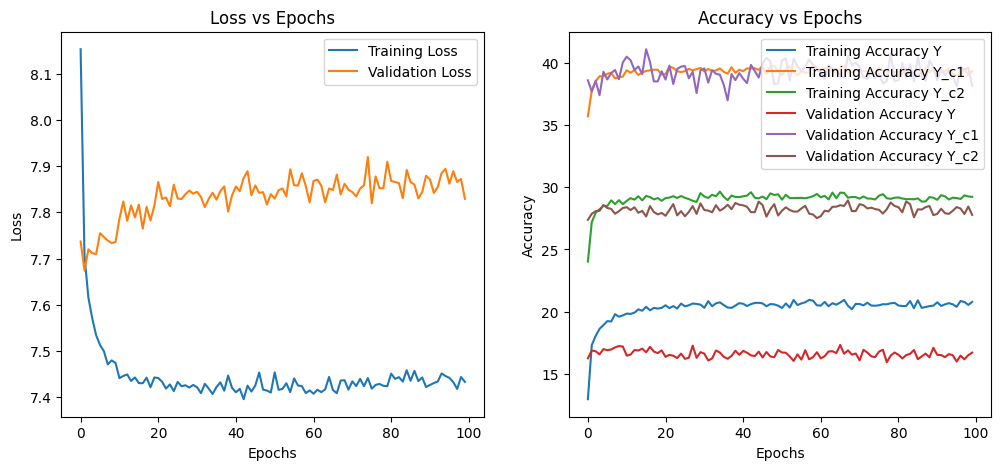

In [49]:
train_losses2, val_losses2, train_accuracies_y2, train_accuracies_y_c12, train_accuracies_y_c22, val_accuraci0es_y2, val_accuracies_y_c12, val_accuracies_y_c22, val_precisions, val_recalls, val_f1_scores = training(model_base_efficientnet2, optimizer, num_epochs, train_loader, val_loader, criterion_y, criterion_y_c1, criterion_y_c2, device)

In [62]:
dropout = 0.2

model_base_efficientnet_2_2 = HierarchicalEfficientNet2(efficient_net_model, dropout=dropout)

optimizer = torch.optim.Adam(model_base_efficientnet2.parameters(), lr=0.001)

In [63]:
train_losses22, val_losses22, train_accuracies_y22, train_accuracies_y_c122, train_accuracies_y_c222, val_accuracies_y22, val_accuracies_y_c122, val_accuracies_y_c222, val_precisions22, val_recalls22, val_f1_scores22 = training(model_base_efficientnet_2_2, optimizer, num_epochs, train_loader, val_loader, criterion_y, criterion_y_c1, criterion_y_c2, device)



Epoch [1/100] Training Loss: 9.8035, Accuracies Y/C1/C2: 1.02%, 12.90%, 4.94% | Validation Loss: 9.7802, Accuracies Y/C1/C2: 0.95%, 13.07%, 4.88%


Epoch [2/100] Training Loss: 9.8071, Accuracies Y/C1/C2: 1.09%, 13.13%, 5.08% | Validation Loss: 9.7811, Accuracies Y/C1/C2: 0.93%, 13.03%, 5.07%


Epoch [3/100] Training Loss: 9.8040, Accuracies Y/C1/C2: 1.08%, 13.24%, 4.99% | Validation Loss: 9.7833, Accuracies Y/C1/C2: 0.99%, 12.96%, 4.97%


Epoch [4/100] Training Loss: 9.8011, Accuracies Y/C1/C2: 1.09%, 13.28%, 5.14% | Validation Loss: 9.7825, Accuracies Y/C1/C2: 1.01%, 13.35%, 4.70%


Epoch [5/100] Training Loss: 9.8057, Accuracies Y/C1/C2: 0.99%, 12.97%, 5.14% | Validation Loss: 9.7790, Accuracies Y/C1/C2: 0.98%, 13.06%, 4.92%


Epoch [6/100] Training Loss: 9.8030, Accuracies Y/C1/C2: 1.03%, 13.28%, 4.98% | Validation Loss: 9.7802, Accuracies Y/C1/C2: 0.99%, 13.50%, 4.89%


Epoch [7/100] Training Loss: 9.8012, Accuracies Y/C1/C2: 1.03%, 12.87%, 5.00% | Validation Loss: 9.7789, Accura

KeyboardInterrupt: 